**Atualizando a biblioteca para plotagem de gráficos**


In [801]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [802]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [803]:
base = pd.read_csv('/content/sample_data/restaurante_correto.csv', sep=';')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [804]:
#base2 = pd.read_csv('/content/sample_data/restaurante.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [805]:
base

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim
3,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,10-30,Sim
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,Nao
5,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10,Nao
7,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10,Sim
8,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60,Nao
9,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,10-30,Nao


In [806]:
base.head(3)

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim


In [807]:
base.tail(2)

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
10,Nao,Nao,Nao,Nao,Nenhum,R,Nao,Nao,Tailandes,0-10,Nao
11,Sim,Sim,Sim,Sim,Cheio,R,Nao,Nao,Hamburger,30-60,Sim


**Contando quantidade de instâncias**


In [808]:
np.unique(base['Conclusao'], return_counts=True)

(array(['Nao', 'Sim'], dtype=object), array([6, 6]))

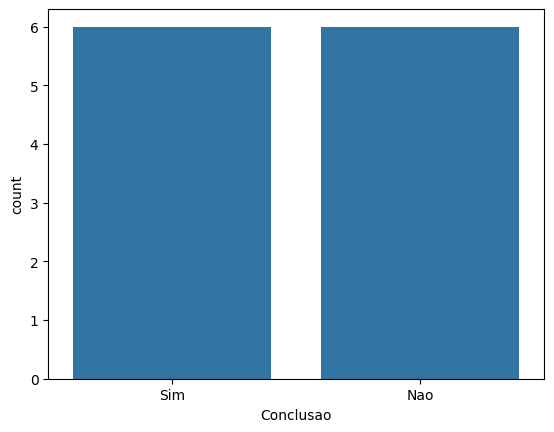

In [809]:
sns.countplot(x = base['Conclusao']);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [810]:
from sklearn.preprocessing import LabelEncoder

In [811]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
cols_label_encode = ['Alternativo', 'Bar', 'SexSab','fome', 'Cliente','Preco', 'Chuva', 'Res','Tempo']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

In [812]:
base

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,1,0,0,1,0,2,0,1,Frances,0,Sim
1,1,0,0,1,1,0,0,0,Tailandes,2,Nao
2,0,1,0,0,0,0,0,0,Hamburger,0,Sim
3,1,0,1,1,1,0,1,0,Tailandes,1,Sim
4,1,0,1,0,1,2,0,1,Frances,3,Nao
5,0,1,0,1,0,1,1,1,Italiano,0,Sim
6,0,1,0,0,2,0,1,0,Hamburger,0,Nao
7,0,0,0,1,0,1,1,1,Tailandes,0,Sim
8,0,1,1,0,1,0,1,0,Hamburger,3,Nao
9,1,1,1,1,1,2,0,1,Italiano,1,Nao




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [813]:
len(np.unique(base['Cliente']))

3

In [814]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [815]:
cols_onehot_encode = ['Tipo']

# Aplicar o OneHotEncoder apenas nas colunas especificadas
base_encoded = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), cols_onehot_encode)],
    remainder='passthrough'
).fit_transform(base)

In [816]:
base_encoded

array([[1.0, 0.0, 0.0, 0.0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 'Sim'],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 'Nao'],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 'Sim'],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 'Sim'],
       [1.0, 0.0, 0.0, 0.0, 1, 0, 1, 0, 1, 2, 0, 1, 3, 'Nao'],
       [0.0, 0.0, 1.0, 0.0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 'Sim'],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 'Nao'],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 'Sim'],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 1, 0, 1, 0, 1, 0, 3, 'Nao'],
       [0.0, 0.0, 1.0, 0.0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 'Nao'],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 'Nao'],
       [0.0, 1.0, 0.0, 0.0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 'Sim']],
      dtype=object)

In [817]:
base_encoded.shape

(12, 14)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [818]:
X_prev= base_encoded[:, :-1]  # Supondo que a última coluna seja o target
y_classe = base_encoded[:, -1]

**Método de amostragem Holdout**

In [819]:
from sklearn.model_selection import train_test_split

In [820]:
X_prev

array([[1.0, 0.0, 0.0, 0.0, 1, 0, 0, 1, 0, 2, 0, 1, 0],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 0, 1, 1, 0, 0, 0, 2],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1, 0, 1, 0, 1, 2, 0, 1, 3],
       [0.0, 0.0, 1.0, 0.0, 0, 1, 0, 1, 0, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 2, 0, 1, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 1, 0, 1, 0, 1, 0, 3],
       [0.0, 0.0, 1.0, 0.0, 1, 1, 1, 1, 1, 2, 0, 1, 1],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 1, 1, 1, 1, 1, 0, 0, 0, 2]], dtype=object)

In [821]:
y_classe

array(['Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao',
       'Nao', 'Nao', 'Sim'], dtype=object)

In [822]:
y_classe.shape

(12,)

In [823]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [824]:
X_treino.shape

(9, 13)

In [825]:
X_teste.shape

(3, 13)

In [826]:
X_teste

array([[0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 2, 0, 1, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 1, 1, 1, 1, 1, 0, 0, 0, 2],
       [1.0, 0.0, 0.0, 0.0, 1, 0, 1, 0, 1, 2, 0, 1, 3]], dtype=object)

In [827]:
y_treino

array(['Nao', 'Sim', 'Nao', 'Nao', 'Sim', 'Nao', 'Sim', 'Sim', 'Sim'],
      dtype=object)

In [828]:
y_teste

array(['Nao', 'Sim', 'Nao'], dtype=object)

In [829]:
import pickle

In [830]:
with open('/content/sample_data/RestauranteAtual.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)